# PROJETO 2 – APRENDIZADO NÃO SUPERVISIONADO

- Selecionar pelo menos dois datasets:
    - Aplicar um modelo neural não supervisionado
    - Avaliar os padrões detectados em cada conjunto:
        - Clusters / outliers, etc.
    - Avaliar a homogeneidade dos agrupamentos
    - Variar os parâmetros do modelo (grid, taxas, número de neurônios, etc.)

# Dataset

Este dataset analizado conta com 154 amostras de série temporal que representam locais queimados enquanto 154 amostras de séries temporais que representam não queimada

/tmp/ipykernel_203924/1832094113.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


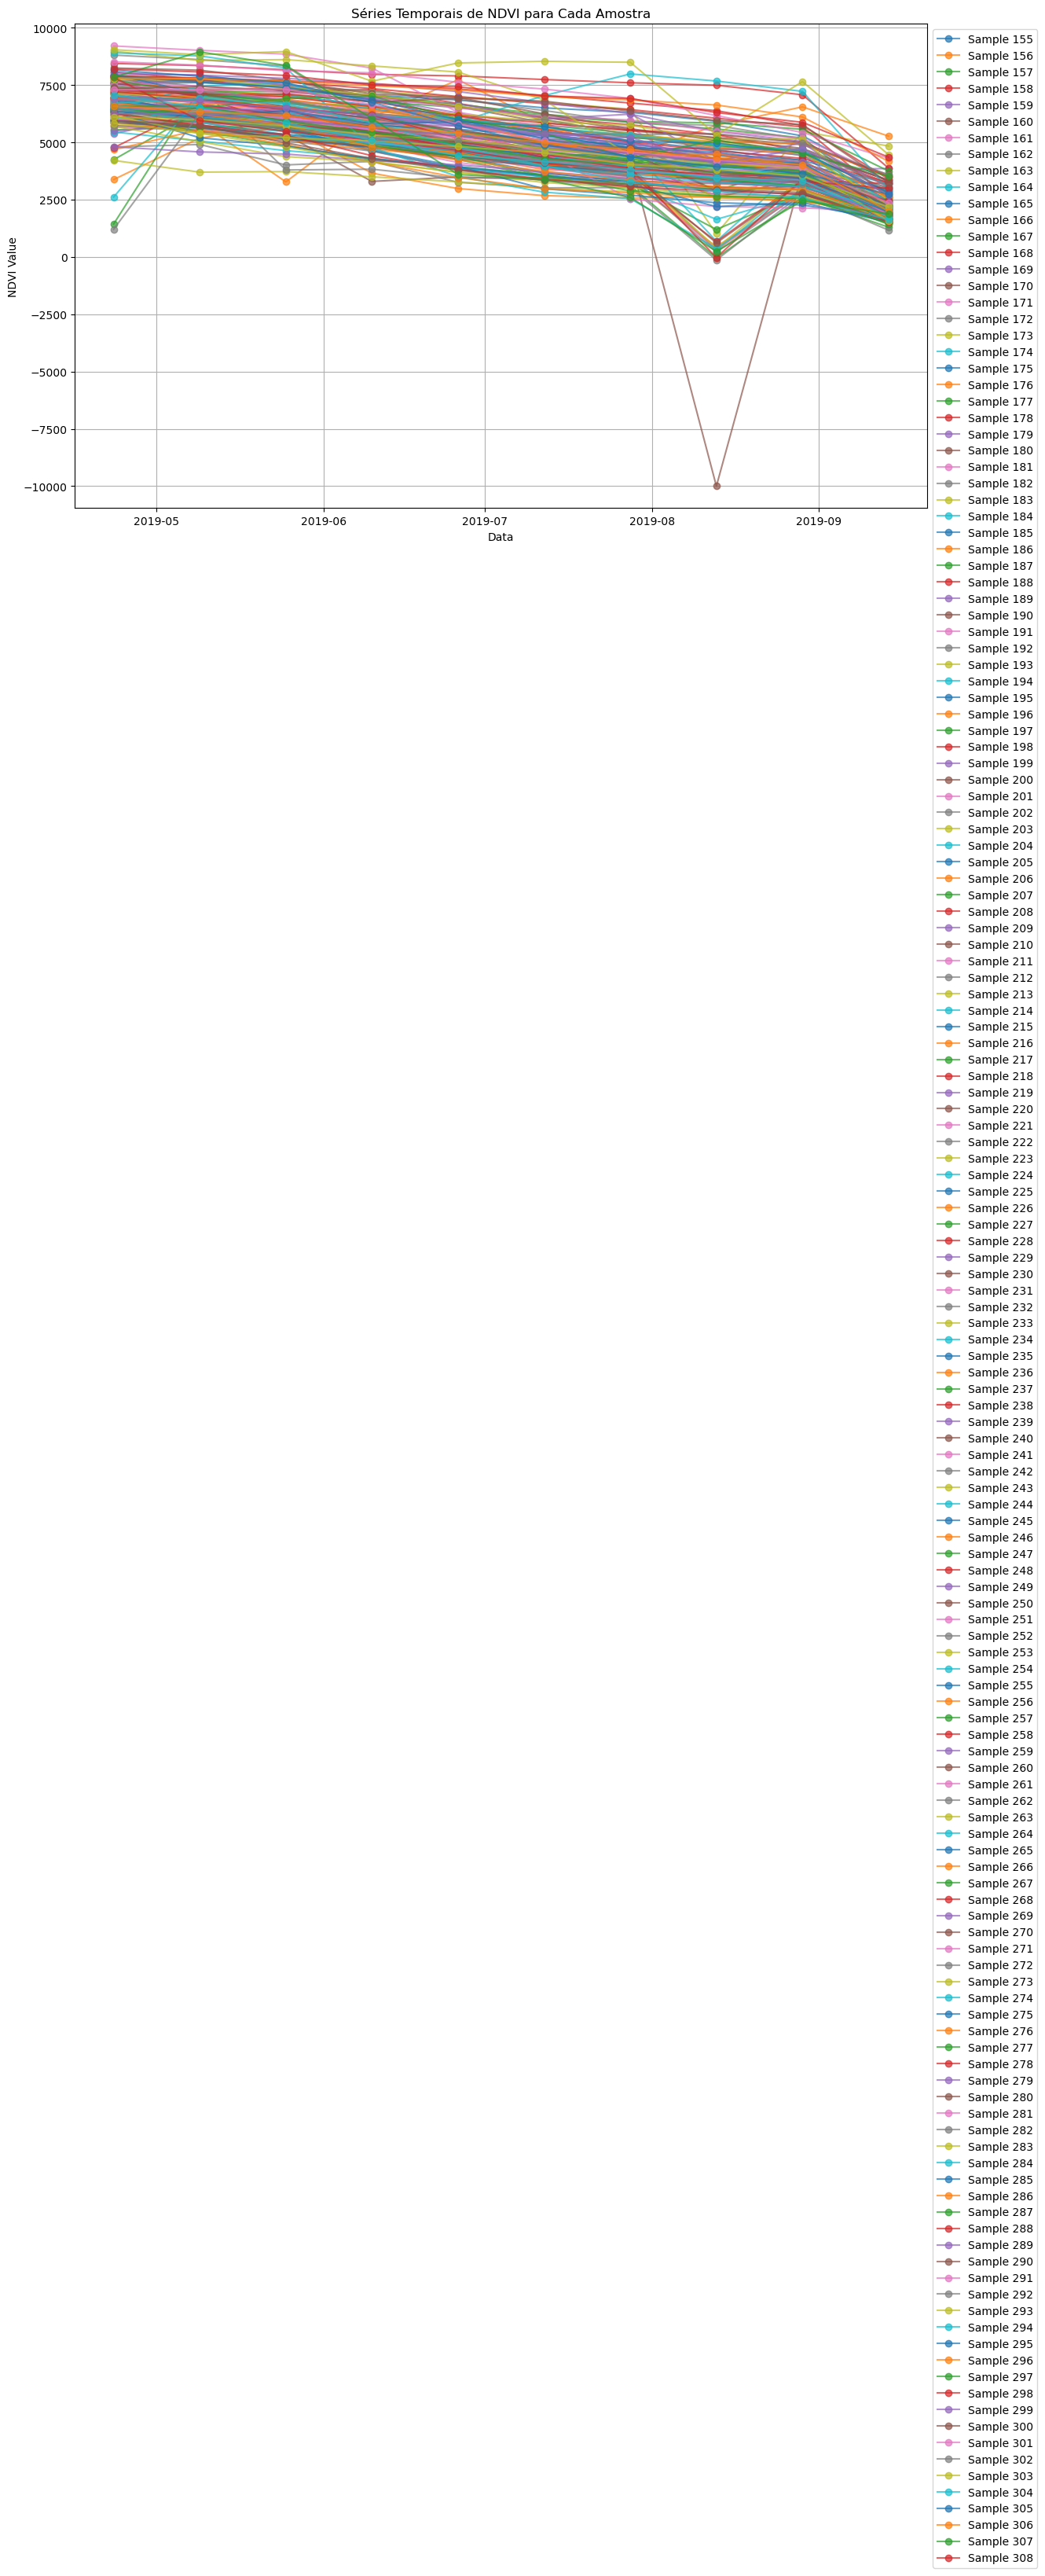

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Função para converter a data em datetime
def parse_date(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d")

# Carregar os dados a partir de um arquivo CSV
# Substitua 'seu_arquivo.csv' pelo caminho para o seu arquivo CSV
df = pd.read_csv('2019_17_09_transformado_resample_com_valores_e_datas.csv')

# Filtrar apenas os registros com queimada (coluna 'queimada' == 1)
queimadas = df[df['queimada'] == 1]

# Lista de colunas de valores e datas para NDVI
valores_ndvi = [f'ndvi_value_{i}' for i in range(1, 11)]
datas_ndvi = [f'ndvi_date_{i}' for i in range(1, 11)]

# Criar um gráfico
plt.figure(figsize=(14, 8))

# Iterar sobre cada amostra e plotar os valores NDVI
for index, row in queimadas.iterrows():
    dates = [pd.to_datetime(row[date_col]) for date_col in datas_ndvi]
    values = [row[value_col] for value_col in valores_ndvi]
    plt.plot(dates, values, marker='o', linestyle='-', label=f'Sample {index+1}', alpha=0.7)

# Adicionar título e legendas
plt.title('Séries Temporais de NDVI para Cada Amostra de queimada')
plt.xlabel('Data')
plt.ylabel('NDVI Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Função para converter a data em datetime
def parse_date(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d")

# Carregar os dados a partir de um arquivo CSV
# Substitua 'seu_arquivo.csv' pelo caminho para o seu arquivo CSV
df = pd.read_csv('2019_17_09_transformado_resample_com_valores_e_datas.csv')

# Filtrar apenas os registros com queimada (coluna 'queimada' == 1)
queimadas = df[df['queimada'] == 0]

# Lista de colunas de valores e datas para NDVI
valores_ndvi = [f'ndvi_value_{i}' for i in range(1, 11)]
datas_ndvi = [f'ndvi_date_{i}' for i in range(1, 11)]

# Criar um gráfico
plt.figure(figsize=(14, 8))

# Iterar sobre cada amostra e plotar os valores NDVI
for index, row in queimadas.iterrows():
    dates = [pd.to_datetime(row[date_col]) for date_col in datas_ndvi]
    values = [row[value_col] for value_col in valores_ndvi]
    plt.plot(dates, values, marker='o', linestyle='-', label=f'Sample {index+1}', alpha=0.7)

# Adicionar título e legendas
plt.title('Séries Temporais de NDVI para Cada Amostra de queimada')
plt.xlabel('Data')
plt.ylabel('NDVI Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


KeyError: 'queimada'

# Conclusão da série temporal 

As séries temporais de queimada são bem parecidas entre si e as de não queimada também sempre existe um gradiente negativo no fim da série temporal de queimada e isso que indica uma queimada. 

# começando o exemplo 

Esse sistema começá com a seguite classificação em séries

In [1]:
from minisom import MiniSom
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
data = pd.read_csv('2019_17_09_transformado_resample_com_valores_e_datas.csv',
                    names=['target','latitude','longitude','epsg','swir22_value_1','swir22_value_2','swir22_value_3','swir22_value_4','swir22_value_5','swir22_value_6','swir22_value_7','swir22_value_8','swir22_value_9','swir22_value_10','swir22_date_1','swir22_date_2','swir22_date_3','swir22_date_4','swir22_date_5','swir22_date_6','swir22_date_7','swir22_date_8','swir22_date_9','swir22_date_10','nir08_value_1','nir08_value_2','nir08_value_3','nir08_value_4','nir08_value_5','nir08_value_6','nir08_value_7','nir08_value_8','nir08_value_9','nir08_value_10','nir08_date_1','nir08_date_2','nir08_date_3','nir08_date_4','nir08_date_5','nir08_date_6','nir08_date_7','nir08_date_8','nir08_date_9','nir08_date_10','ndvi_value_1','ndvi_value_2','ndvi_value_3','ndvi_value_4','ndvi_value_5','ndvi_value_6','ndvi_value_7','ndvi_value_8','ndvi_value_9','ndvi_value_10','ndvi_date_1','ndvi_date_2','ndvi_date_3','ndvi_date_4','ndvi_date_5','ndvi_date_6','ndvi_date_7','ndvi_date_8','ndvi_date_9','ndvi_date_10'],sep=',')
data_1_column = int(len(data['target']))
data_without_date=np.zeros((data_1_column,int(11)))

In [65]:
data = pd.read_csv('/home/danielfarkat/git/neuro /neuro/SOM/filtered_filled_nbr_interpolado_v3.csv',
                    names=['fid','target','1_1_2022','1_17_2022','2_2_2022','2_18_2022','3_6_2022','3_22_2022','4_7_2022','4_23_2022',
    '5_9_2022','5_25_2022','6_10_2022','6_26_2022','7_12_2022','7_28_2022','8_13_2022','8_29_2022',
    '9_14_2022','9_30_2022','10_16_2022','11_1_2022','11_17_2022','12_3_2022','12_19_2022','1_1_2023','1_17_2023','2_2_2023','2_18_2023','3_6_2023','3_22_2023','4_7_2023','4_23_2023','5_9_2023','5_25_2023'],sep=',')
data_1_column = int(len(data['target']))
data_without_date=np.zeros((data_1_column,int(11)))

In [66]:
data['1_1_2022']

0      3698
1      4685
2      4605
3      4563
4      4275
       ... 
665    7172
666    4803
667    5178
668    4814
669    3468
Name: 1_1_2022, Length: 670, dtype: int64

In [67]:

targetdata = data
valores_ndvi_cols = [
    '1_1_2022','1_17_2022','2_2_2022','2_18_2022','3_6_2022','3_22_2022','4_7_2022','4_23_2022',
    '5_9_2022','5_25_2022','6_10_2022','6_26_2022','7_12_2022','7_28_2022','8_13_2022','8_29_2022',
    '9_14_2022','9_30_2022','10_16_2022','11_1_2022','11_17_2022','12_3_2022','12_19_2022','1_1_2023','1_17_2023','2_2_2023','2_18_2023','3_6_2023','3_22_2023','4_7_2023','4_23_2023','5_9_2023','5_25_2023'
]

colunas_selecionadas = ['target'] + valores_ndvi_cols
data_selecionada = data[colunas_selecionadas]
data = []
data = targetdata[colunas_selecionadas]



In [36]:
import pandas as pd
import numpy as np
from minisom import MiniSom

# Carregar os dados
data = pd.read_csv('filtered_filled_ndvi_sample_alteredo_v3.csv', names=[
    'fid', 'target', '7_28_2021', '8_13_2021', '8_29_2021', '9_14_2021',
    '9_30_2021', '10_16_2021', '11_1_2021', '11_17_2021', '12_3_2021',
    '12_19_2021', '1_1_2022', '1_17_2022', '2_2_2022', '2_18_2022',
    '3_6_2022', '3_22_2022', '4_7_2022', '4_23_2022', '5_9_2022',
    '5_25_2022', '6_10_2022', '6_26_2022', '7_12_2022', '7_28_2022',
    '8_13_2022', '8_29_2022', '9_14_2022', '9_30_2022'
], sep=',')

# Selecionar as colunas desejadas
valores_ndvi_cols = [
    '7_28_2021', '8_13_2021', '8_29_2021', '9_14_2021', '9_30_2021',
    '10_16_2021', '11_1_2021', '11_17_2021', '12_3_2021', '12_19_2021',
    '1_1_2022', '1_17_2022', '2_2_2022', '2_18_2022', '3_6_2022',
    '3_22_2022', '4_7_2022', '4_23_2022', '5_9_2022', '5_25_2022',
    '6_10_2022', '6_26_2022', '7_12_2022', '7_28_2022', '8_13_2022',
    '8_29_2022', '9_14_2022', '9_30_2022'
]

colunas_selecionadas = ['target'] + valores_ndvi_cols
data_selecionada = data[colunas_selecionadas]

# Convertendo valores para float e lidando com erros
for coluna in valores_ndvi_cols:
    data_selecionada[coluna] = pd.to_numeric(data_selecionada[coluna], errors='coerce')

# Lidar com valores ausentes, substituindo por zero ou removendo linhas
data_selecionada = data_selecionada.fillna(0)  # ou use data_selecionada.dropna() para remover linhas com NaN

# Selecionar apenas os dados NDVI para o treinamento
x = data_selecionada[valores_ndvi_cols].values


/tmp/ipykernel_17737/1266218903.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selecionada[coluna] = pd.to_numeric(data_selecionada[coluna], errors='coerce')


In [68]:
def get_info_dataframe(dataframe):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(dataframe.shape)

get_info_dataframe(data)

print(data['target'].unique())

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   target      670 non-null    int64
 1   1_1_2022    670 non-null    int64
 2   1_17_2022   670 non-null    int64
 3   2_2_2022    670 non-null    int64
 4   2_18_2022   670 non-null    int64
 5   3_6_2022    670 non-null    int64
 6   3_22_2022   670 non-null    int64
 7   4_7_2022    670 non-null    int64
 8   4_23_2022   670 non-null    int64
 9   5_9_2022    670 non-null    int64
 10  5_25_2022   670 non-null    int64
 11  6_10_2022   670 non-null    int64
 12  6_26_2022   670 non-null    int64
 13  7_12_2022   670 non-null    int64
 14  7_28_2022   670 non-null    int64
 15  8_13_2022   670 non-null    int64
 16  8_29_2022   670 non-null    int64
 17  9_14_2022   670 non-null    int64
 18  9_30_2022   670 non-null    int64
 19  10_16_2022  670 non-null    int64
 20  11_1_

In [93]:
print(x.shape[1])

33


In [84]:
x = data.drop(['target'], axis=1)
target=data['target'].values

# Parametros do modelo:

In [47]:
sigma = 10
eta = 0.1
epocas = 200
random_seed = 14

neighborhood_function = 'gaussian'
topology = 'rectangular'
neuD1 = 12 # número de neurônios (dimensão 01 - linhas)
neuD2 = 8 # número de neurônios (dimensao 02 - colunas)

Tempo de execução (inicialização e treinamento): 488.16 segundos


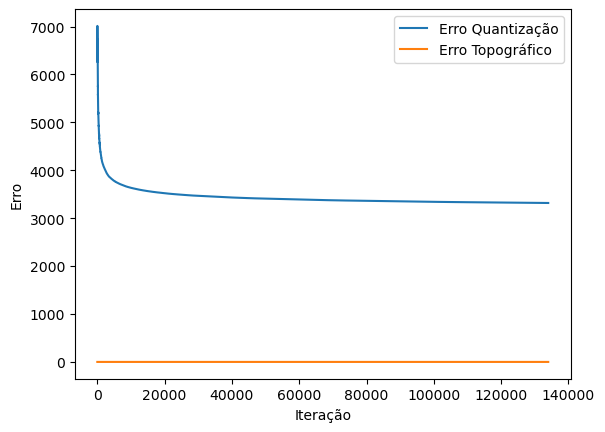

In [48]:
import time
start_time =time.time()
som_1 = MiniSom(neuD1, neuD2, x.shape[1],
              sigma=sigma,
              learning_rate=eta,
              neighborhood_function=neighborhood_function,
              random_seed=random_seed)

som_1.random_weights_init(x.values)
som_1.train_random(x.values, epocas)


q_error = []
t_error = []

for i in range(epocas*len(x.values)):
    rand_i = np.random.randint(len(x.values))
    som_1.update(x.values[rand_i], som_1.winner(x.values[rand_i]), i, epocas)
    q_error.append(som_1.quantization_error(x.values))
    t_error.append(som_1.topographic_error(x.values))
end_time =time.time()
print(f"Tempo de execução (inicialização e treinamento): {end_time - start_time:.2f} segundos")

plt.plot(np.arange(epocas*len(x.values)), q_error, label='Erro Quantização')
plt.plot(np.arange(epocas*len(x.values)), t_error, label='Erro Topográfico')
plt.ylabel('Erro')
plt.xlabel('Iteração')
plt.legend()
plt.show()

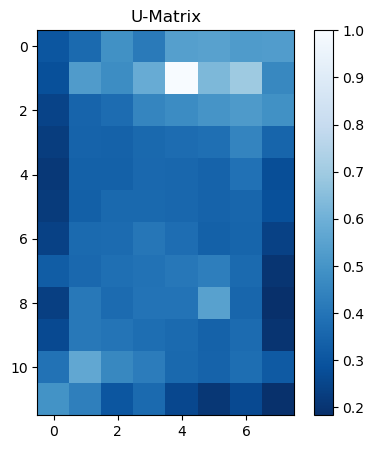

In [49]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som_1.distance_map(), cmap='Blues_r')
plt.title('U-Matrix')
plt.colorbar()
plt.show()

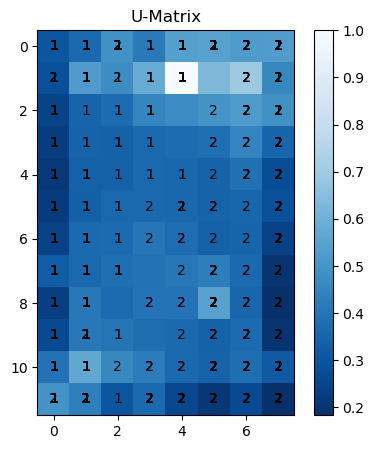

In [50]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som_1.distance_map(), cmap='Blues_r')
plt.title('U-Matrix')
plt.colorbar()

for idx,xx in enumerate (x.values):
    w = som_1.winner(xx)
    plt.text(w[1],w[0],target[idx]+1,horizontalalignment='center',verticalalignment='center')
plt.show()

# Da U-matrix

Essa umatrix está mais homogênia e isso pode se dar talvez ao fato de que nosa matriz está com valores bem próximos entre si 

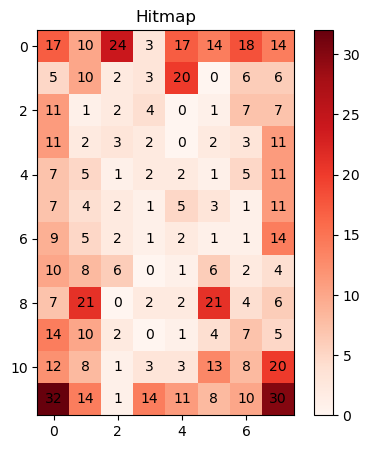

In [51]:
hits = som_1.activation_response(x.values).astype(int)
# hits = hits.T[::-1]
figure(figsize=(5, 5),dpi=100)
plt.imshow(hits,cmap='Reds')
plt.colorbar()
for (i, j), value in np.ndenumerate(hits):
          plt.text(j, i, value, horizontalalignment='center', verticalalignment='center')

plt.title('Hitmap')
plt.show()

In [52]:
import pandas as pd
# Supondo que você já tenha x e target definidos, onde x é um DataFrame e target é um array ou série


In [53]:
from sklearn.decomposition import PCA


# Aplicar PCA para reduzir a dimensionalidade dos dados para 2 dimensões
pca = PCA(n_components=4)
X_pca = pca.fit_transform(x.values)


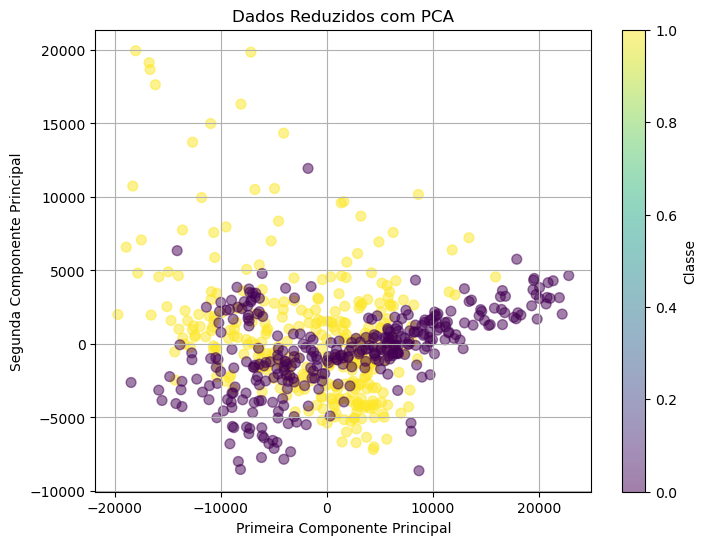

In [54]:
plt.figure(figsize=(8, 6))

# Criar um gráfico de dispersão dos dados reduzidos
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap='viridis', s=50, alpha=0.5)

# Adicionar uma barra de cor
plt.colorbar(scatter, label='Classe')

plt.title('Dados Reduzidos com PCA')
plt.xlabel('Primeira Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid()
plt.show()


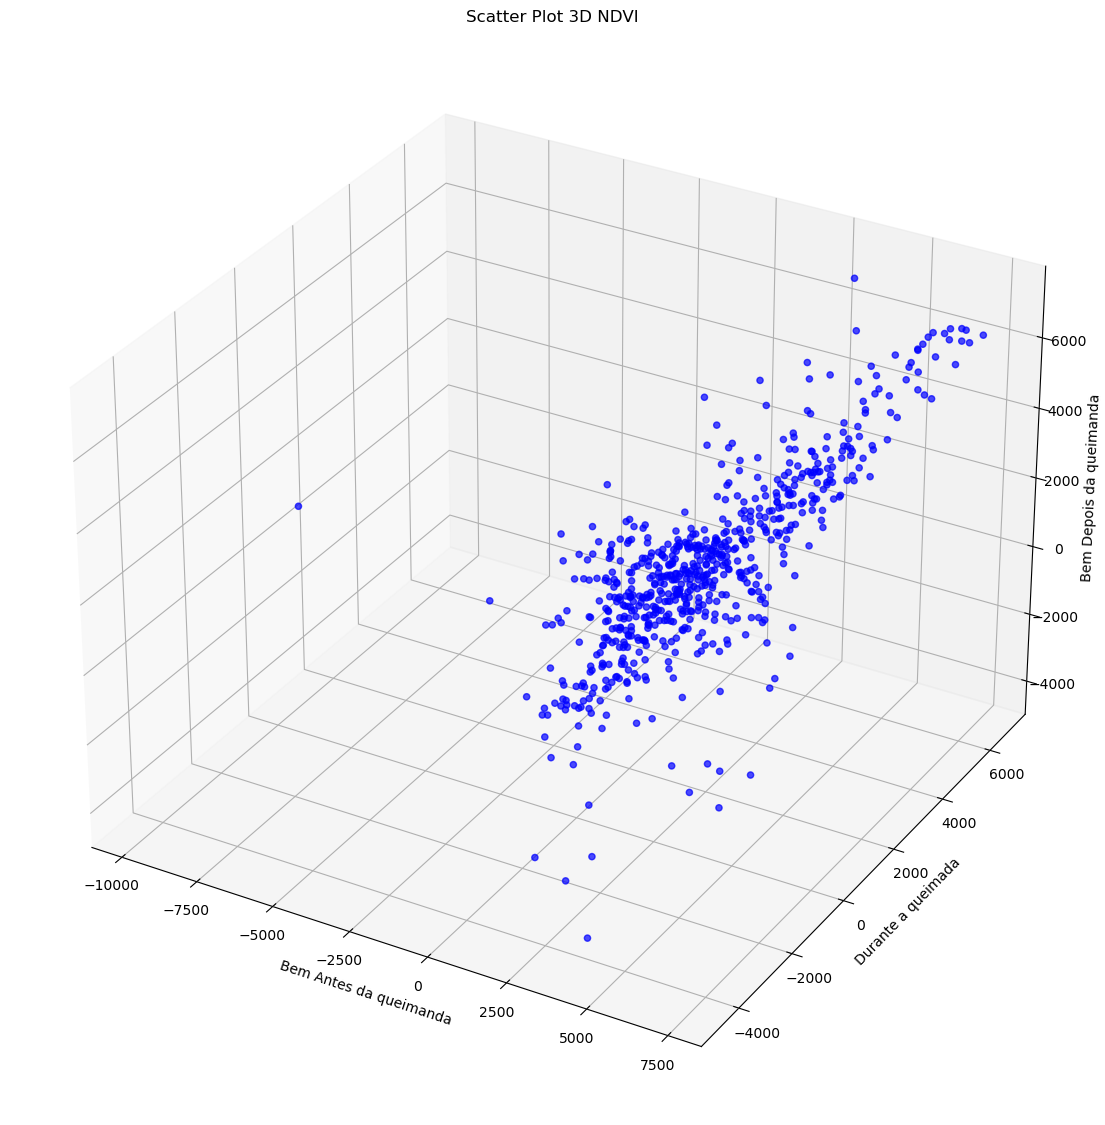

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Passo 1: Ler o arquivo CSV
# Substitua 'seu_arquivo.csv' pelo caminho para seu arquivo CSV
#df = pd.read_csv('filtered_filled_ndvi_sample_interpolado_v3.csv')

# Passo 2: Selecionar as colunas para o scatter plot 3D
# Substitua 'coluna_x', 'coluna_y' e 'coluna_z' pelos nomes reais das colunas
x = data['1_1_2022']
y = data['9_30_2022']
z = data['5_25_2023']

# Passo 3: Criar o scatter plot 3D
fig = plt.figure(figsize=(14, 16))  # Tamanho da figura, ajuste conforme necessário
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, alpha=0.7, c='b', marker='o')  # c define a cor dos pontos e marker define o formato

# Passo 4: Adicionar rótulos e título
ax.set_xlabel('Bem Antes da queimanda')  # Substitua pelo nome real
ax.set_ylabel('Durante a queimada')  # Substitua pelo nome real
ax.set_zlabel('Bem Depois da queimanda')  # Substitua pelo nome real
ax.set_title('Scatter Plot 3D NDVI')

# Passo 5: Mostrar o gráfico
plt.show()


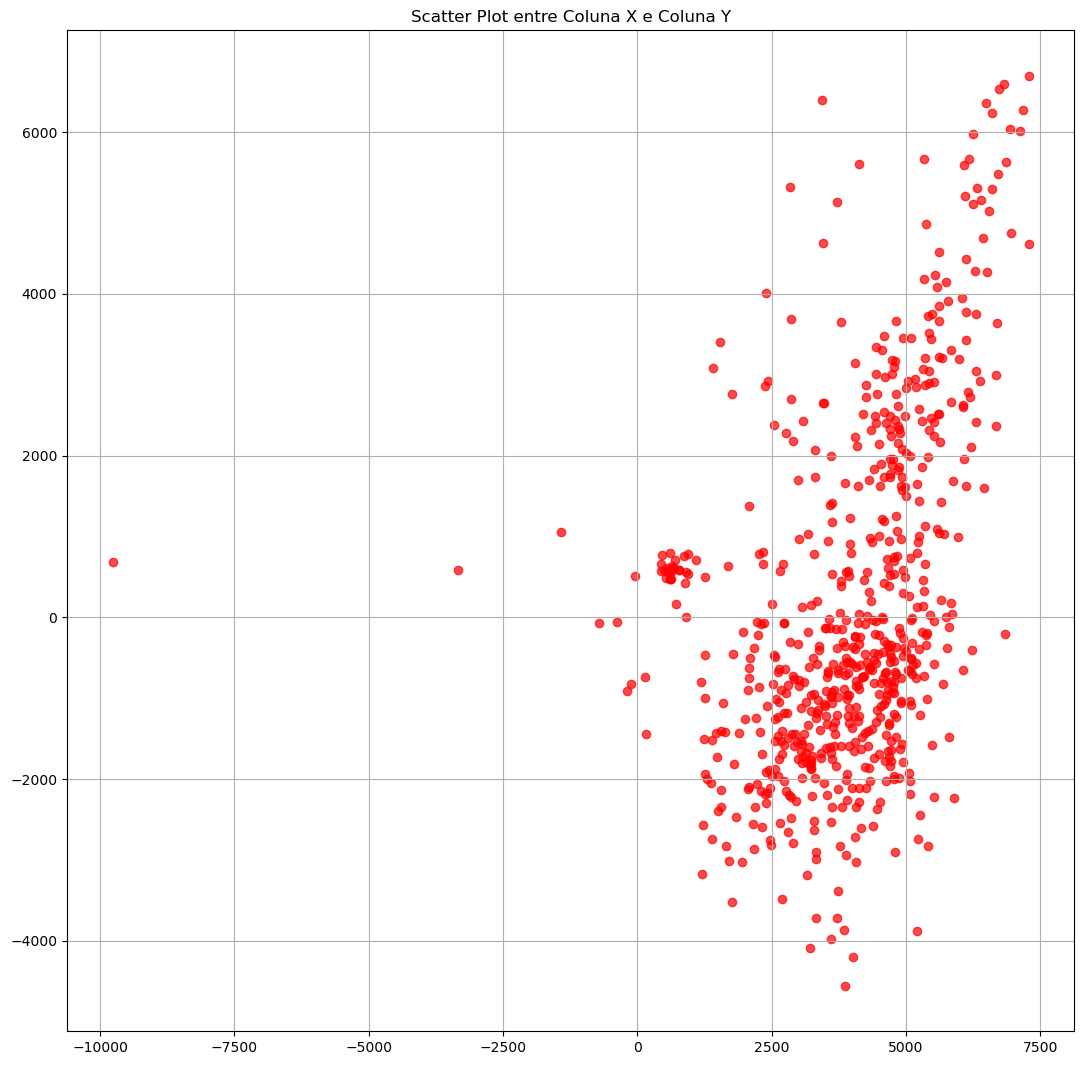

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Passo 1: Ler o arquivo CSV
# Substitua 'seu_arquivo.csv' pelo caminho para seu arquivo CSV
#df = pd.read_csv('filtered_filled_ndvi_sample_interpolado_v3.csv')

# Passo 2: Selecionar as colunas para o scatter plot
# Substitua 'coluna_x' e 'coluna_y' pelos nomes reais das colunas
x = data['1_1_2022']
y = data['9_30_2022']

# Passo 3: Criar o scatter plot
plt.figure(figsize=(13, 13))  # Tamanho da figura, ajuste conforme necessário
plt.scatter(x, y, alpha=0.7,c='r', marker='o')  # alpha controla a transparência dos pontos

# Passo 4: Adicionar rótulos e título
ax.set_xlabel('Bem Antes da queimanda') 
ax.set_ylabel('Durante a queimada')
plt.title('Scatter Plot entre Coluna X e Coluna Y')

# Passo 5: Mostrar o gráfico
plt.grid(True)
plt.show()


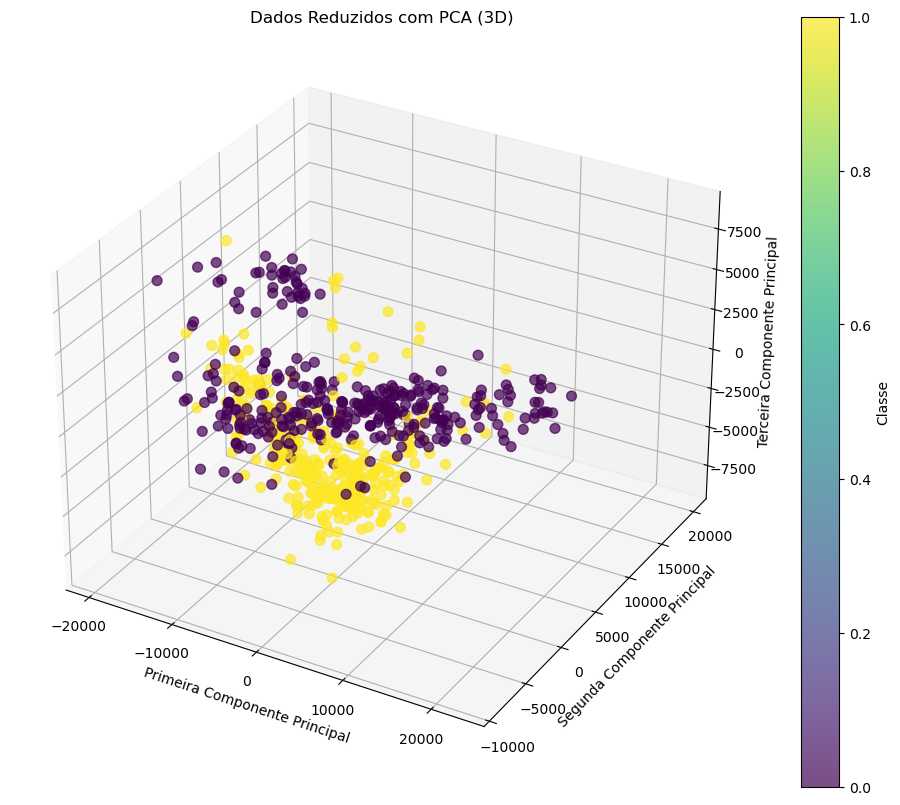

In [73]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Criar o gráfico de dispersão 3D
scatter = ax.scatter(X_pca[:,0], X_pca[:, 1], X_pca[:, 2], c=target, cmap='viridis', s=50, alpha=0.7)

# Adicionar uma barra de cor
cbar = plt.colorbar(scatter, ax=ax, label='Classe')

# Configurar títulos e rótulos
ax.set_title('Dados Reduzidos com PCA (3D)')
ax.set_xlabel('Primeira Componente Principal')
ax.set_ylabel('Segunda Componente Principal')
ax.set_zlabel('Terceira Componente Principal')


plt.show()


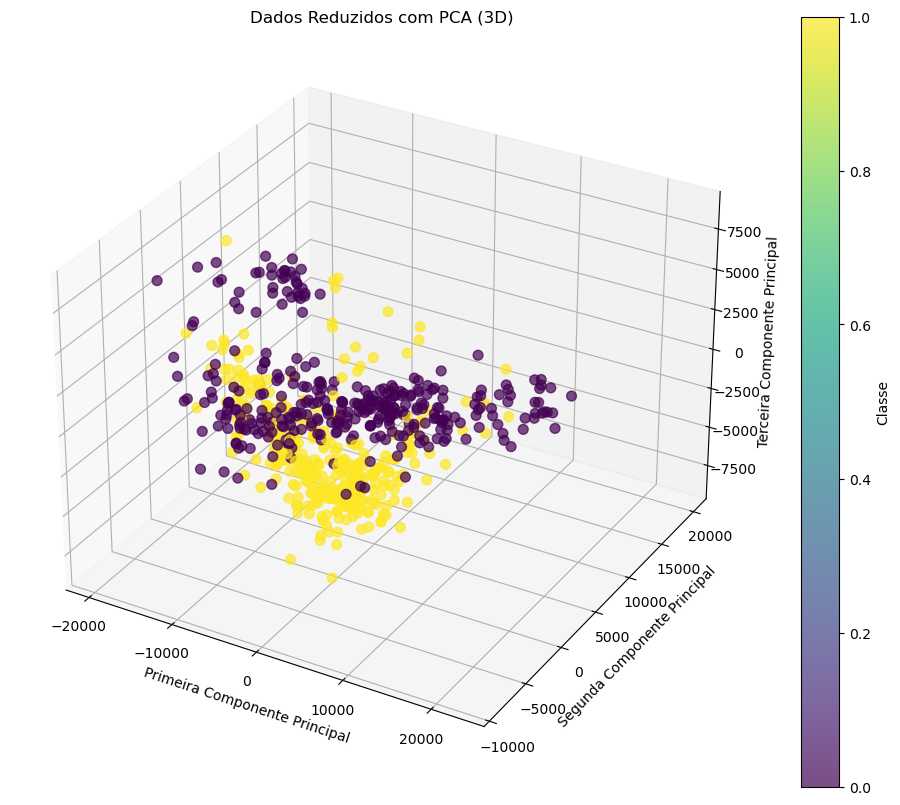

In [58]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Criar o gráfico de dispersão 3D
scatter = ax.scatter(X_pca[:,0], X_pca[:, 1], X_pca[:, 2], c=target, cmap='viridis', s=50, alpha=0.7)

# Adicionar uma barra de cor
cbar = plt.colorbar(scatter, ax=ax, label='Classe')

# Configurar títulos e rótulos
ax.set_title('Dados Reduzidos com PCA (3D)')
ax.set_xlabel('Primeira Componente Principal')
ax.set_ylabel('Segunda Componente Principal')
ax.set_zlabel('Terceira Componente Principal')


plt.show()


# Conclusão do heat map 

é muito interessante ele assumir como 11 um valor que fica clara a distinsão entre os demais pois é essa a qual representa a queimada visto que a queimada ocorreu na última amóstra da série temporal dessa forma posso testar identificar queimada passada áreas com mais de uma queimada e também áreas que estejam com alto rísco de queimada além de poder testar limaires críticos como o proposto por [esse artigo](https://seer.ufu.br/index.php/sociedadenatureza/article/view/67446) 

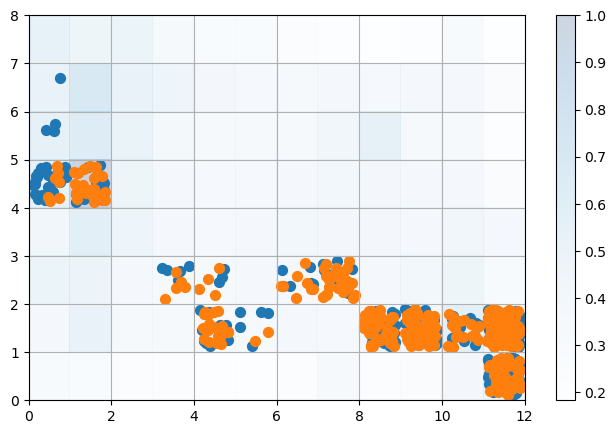

In [74]:
w_x, w_y = zip(*[som_1.winner(d) for d in x.values])
w_x = np.array(w_x)
w_y = np.array(w_y)

figure (figsize=(8,5),dpi=100)
plt.pcolor(som_1.distance_map().T, cmap='Blues', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, label=target[c])
    

plt.grid()
plt.show()

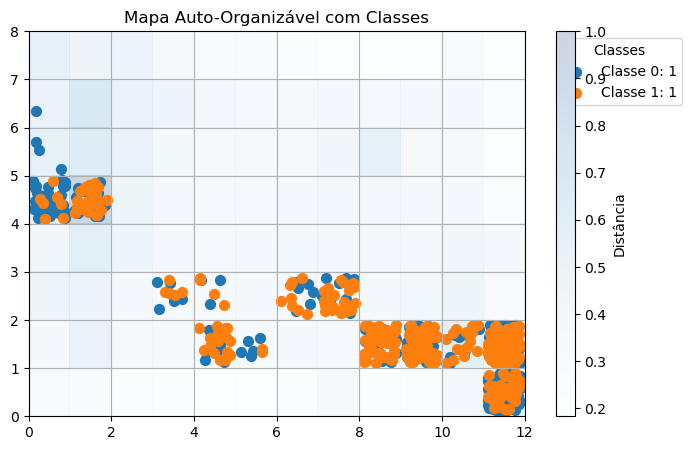

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Suposição de que 'target' é uma array de categorias/classes
# e que 'som_1' é uma instância de um modelo SOM (Self-Organizing Map)

# Obtendo as coordenadas dos neurônios vencedores para cada amostra
w_x, w_y = zip(*[som_1.winner(d) for d in x.values])
w_x = np.array(w_x)
w_y = np.array(w_y)

# Criando a figura
plt.figure(figsize=(8, 5), dpi=100)

# Plotando o mapa de distâncias do SOM
plt.pcolor(som_1.distance_map().T, cmap='Blues', alpha=0.2)
plt.colorbar(label='Distância')

# Adicionando os pontos das classes
for c in np.unique(target):
    idx_target = target == c
    plt.scatter(w_x[idx_target] + .5 + (np.random.rand(np.sum(idx_target)) - .5) * .8,
                w_y[idx_target] + .5 + (np.random.rand(np.sum(idx_target)) - .5) * .8,
                s=50, label=f'Classe {c}: {target[c]}')

# Adicionando a legenda
plt.legend(title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionando grid e título
plt.grid()
plt.title('Mapa Auto-Organizável com Classes')

# Mostrando o gráfico
plt.show()


Mapa de Classes:
Neurônio (2, 0): Classe 1
Neurônio (0, 0): Classe 1
Neurônio (1, 2): Classe 0
Neurônio (2, 1): Classe 1
Neurônio (3, 0): Classe 1
Neurônio (0, 3): Classe 0
Neurônio (2, 2): Classe 1
Neurônio (2, 3): Classe 1
Neurônio (1, 0): Classe 1
Neurônio (1, 1): Classe 1
Neurônio (3, 1): Classe 0
Neurônio (0, 2): Classe 0
Neurônio (0, 1): Classe 0
Neurônio (1, 3): Classe 0
Neurônio (3, 3): Classe 0
Neurônio (3, 2): Classe 0


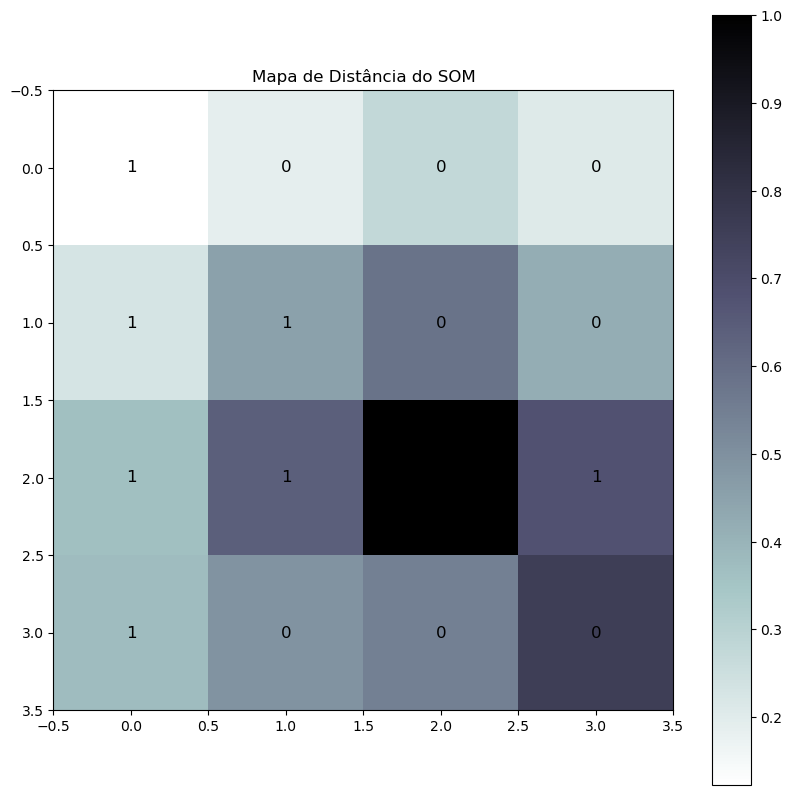

In [61]:
import pandas as pd
from minisom import MiniSom
import numpy as np

# Carregar os dados do CSV
data = pd.read_csv('filtered_filled_ndvi_sample_interpolado_v3.csv')

# Separar fid, classes e atributos
fids = data.iloc[:, 0].values  # Primeiro valor: fid (identificador)
classes = data.iloc[:, 1].values  # Segundo valor: classes
attributes = data.iloc[:, 2:].values  # Os demais valores são atributos

# Normalizar os atributos
attributes = (attributes - np.min(attributes, axis=0)) / (np.max(attributes, axis=0) - np.min(attributes, axis=0))

# Configurar e treinar o SOM
som_size = 4  # Defina o tamanho da grade do SOM (10x10 é um exemplo)
som = MiniSom(som_size, som_size, attributes.shape[1], sigma=1.0, learning_rate=0.5)
som.train_batch(attributes, 10000)  # 1000 iterações

# Função para atribuir uma classe ao neurônio mais próximo
def get_class_from_som(som, attributes, classes):
    # Obter as coordenadas do neurônio vencedor para cada atributo
    win_map = {}
    for i, attr in enumerate(attributes):
        winner = som.winner(attr)
        if winner not in win_map:
            win_map[winner] = []
        win_map[winner].append(classes[i])
    
    # Atribuir a classe mais frequente a cada neurônio
    class_map = {}
    for key, value in win_map.items():
        class_map[key] = max(set(value), key=value.count)
    
    return class_map

# Obter o mapa de classes
class_map = get_class_from_som(som, attributes, classes)

# Exibir o mapa de classes
print("Mapa de Classes:")
for (i, j), cls in class_map.items():
    print(f"Neurônio ({i}, {j}): Classe {cls}")

# Opcional: Exibir o SOM (se desejar)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(som_size):
    for j in range(som_size):
        plt.text(j, i, class_map.get((i, j), '?'), ha='center', va='center', color='black', fontsize=12)
plt.imshow(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.title('Mapa de Distância do SOM')
plt.show()


# como era  de se experar 

- Existe muita confuzao na ideia de um local que representa queimada ou não visto que os locais que representam 1 são os de queimadas exsitem aidna algumas amostras isoladas corretamente classificadas mas no geral visto a homogeniedade os dados acabam atrapalhando na classificação do que ajudando. Poderia testar em um estudo posterior a análise de áreas queimadas somente e ai testar se o sistema é capza de classificar em que estágio está da queimada se está para queimaar, queimada ou queimando.mas, para isso eu provavelmente precisaria ter muitos dados e esse exemplo já é bem claro e deveria dar sim o valor de interesse em estudos posteriores vou testar então mais classes e ver se o sistema é mais capaz de acertar 

# Novo teste 

Neste novo teste vou variar um pouco mais os valores para testar ver se consigo ter um pouco menos de homogenieade tambem vou dobrar a quantidade de neurônios para isso 

In [96]:
sigma = 18
eta = 0.1
epocas = 100
random_seed = 1

neighborhood_function = 'gaussian'
topology = 'rectangular'
neuD1 = 10 # número de neurônios (dimensão 01 - linhas)
neuD2 = 10 # número de neurônios (dimensao 02 - colunas)

/tmp/ipykernel_17737/3548606027.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


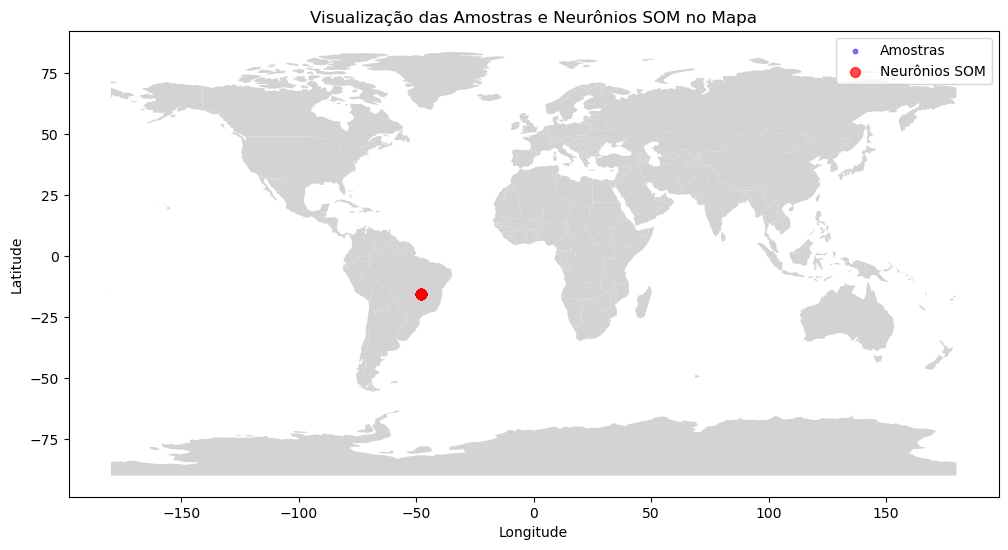

In [101]:
# Criar DataFrames geoespaciais
gdf_samples = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326")
gdf_neurons = gpd.GeoDataFrame(geometry=gpd.points_from_xy(neurons_coords[:, 0], neurons_coords[:, 1]), crs="EPSG:4326")

# Carregar um mapa base (exemplo com o mapa mundi, mas você pode usar um mapa mais específico)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotar o mapa
fig, ax = plt.subplots(figsize=(12, 12))
world.plot(ax=ax, color='lightgrey')

# Plotar coordenadas das amostras
gdf_samples.plot(ax=ax, color='blue', markersize=10, alpha=0.5, label='Amostras')

# Plotar coordenadas dos neurônios do SOM
gdf_neurons.plot(ax=ax, color='red', markersize=50, alpha=0.7, label='Neurônios SOM')

# Ajustar visualização
plt.title('Visualização das Amostras e Neurônios SOM no Mapa')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [100]:
import pandas as pd
import numpy as np
from minisom import MiniSom
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Carregar os dados do CSV
df = pd.read_csv('seu_arquivo.csv')

# Coordenadas das amostras (assumindo que 'x' e 'y' são longitude e latitude, respectivamente)
coords = df[['x', 'y']].values

# Configuração e treinamento do SOM
neuD1, neuD2 = 10, 10  # Exemplo de tamanho da rede
sigma = 0.5
eta = 0.5
neighborhood_function = 'gaussian'
random_seed = 42
epocas = 100

som_2 = MiniSom(neuD1, neuD2, coords.shape[1], sigma=sigma, learning_rate=eta,
                 neighborhood_function=neighborhood_function, random_seed=random_seed)
som_2.random_weights_init(coords)
som_2.train_random(coords, epocas)

# Coordenadas dos neurônios do SOM
weights = som_2.get_weights()
neurons_coords = weights.reshape(-1, 2)


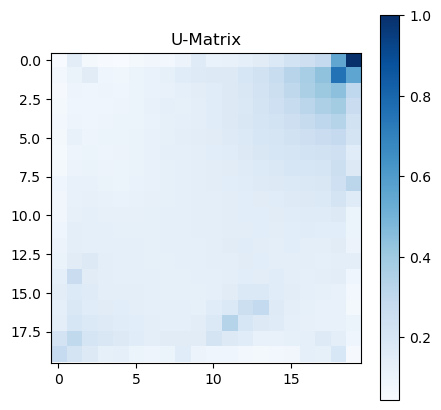

In [62]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som_2.distance_map(), cmap='Blues')
plt.title('U-Matrix')
plt.colorbar()
plt.show()

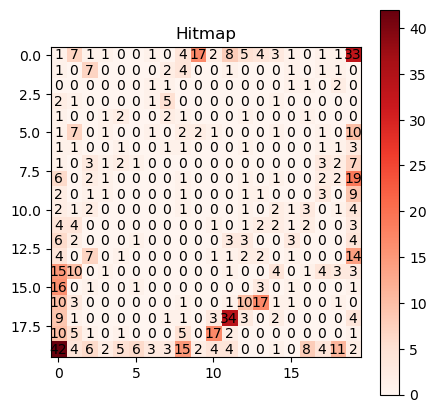

In [63]:
hits = som_2.activation_response(x.values).astype(int)
# hits = hits.T[::-1]
figure(figsize=(5, 5),dpi=100)
plt.imshow(hits,cmap='Reds')
plt.colorbar()
for (i, j), value in np.ndenumerate(hits):
          plt.text(j, i, value, horizontalalignment='center', verticalalignment='center')

plt.title('Hitmap')
plt.show()

# Do heat map 

Fica claro agora que ele gerou 5 clusters bem definidos mas mesmo assim ainda podemos ser clusters ruins e na verdade gostariamos que fossem somente duas classes

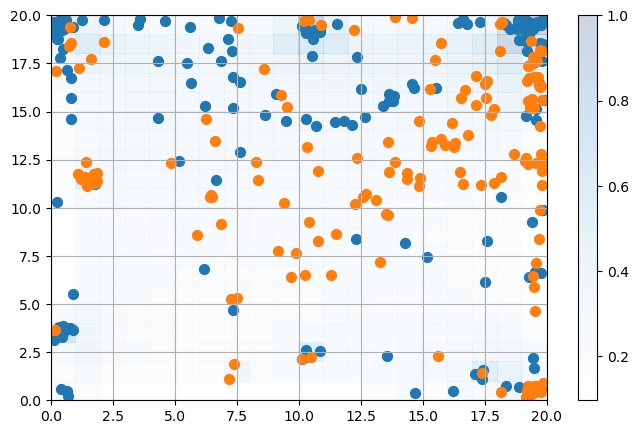

In [29]:
w_x, w_y = zip(*[som_2.winner(d) for d in x.values])
w_x = np.array(w_x)
w_y = np.array(w_y)

figure (figsize=(8,5),dpi=100)
plt.pcolor(som_2.distance_map().T, cmap='Blues', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, label=target[c])
plt.grid()
plt.show()

Embora o cluster esteja bem definido ainda assim ao plotar os valores podemos ver que há bastante confusão

# Mais um teste 

Agora vou alterar para uma grade intermediaria para testar se fazendo uma grade de 15 por 15 meu sistema é capaz de diferenciar melhor entre as duas classes e tambem alterei um pouco os valores das constantes para testar o tanto que elas empacatam aumentei tambem o nimero de épocas e mantive a função de vizinhança como gaussiana e mantive a topologia como retangular.

In [31]:
sigma = 1
eta = 0.1
epocas = 500
random_seed = 1

neighborhood_function = 'gaussian'
topology = 'rectangular'
neuD1 = 15 # número de neurônios (dimensão 01 - linhas)
neuD2 = 15 # número de neurônios (dimensao 02 - colunas)

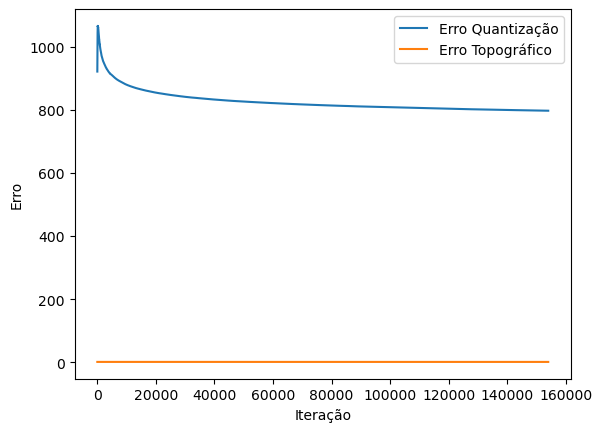

In [32]:
som_3 = MiniSom(neuD1, neuD2, x.shape[1],
              sigma=sigma,
              learning_rate=eta,
              neighborhood_function=neighborhood_function,
              random_seed=random_seed)

som_3.random_weights_init(x.values)
som_3.train_random(x.values, epocas)

q_error = []
t_error = []

for i in range(epocas*len(x.values)):
    rand_i = np.random.randint(len(x.values))
    som_3.update(x.values[rand_i], som_3.winner(x.values[rand_i]), i, epocas)
    q_error.append(som_3.quantization_error(x.values))
    t_error.append(som_3.topographic_error(x.values))

plt.plot(np.arange(epocas*len(x.values)), q_error, label='Erro Quantização')
plt.plot(np.arange(epocas*len(x.values)), t_error, label='Erro Topográfico')
plt.ylabel('Erro')
plt.xlabel('Iteração')
plt.legend()
plt.show()

Disso minha funçào demorou um pouco mais para funcionar até por que foram consideradas mais variáveis 

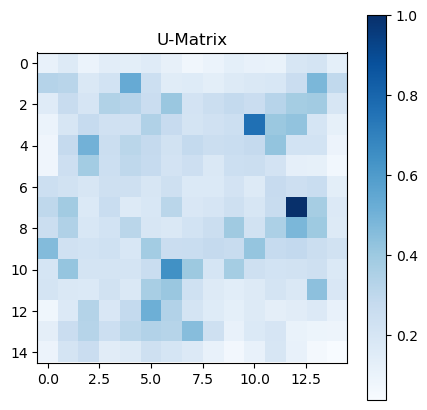

In [33]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som_3.distance_map(), cmap='Blues')
plt.title('U-Matrix')
plt.colorbar()
plt.show()

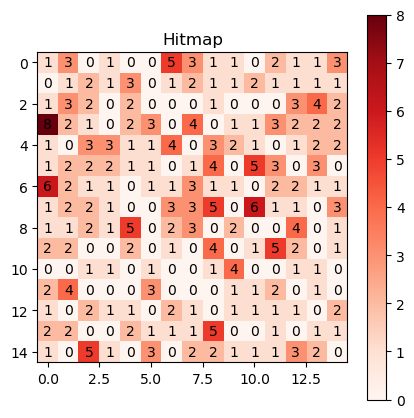

In [34]:
hits = som_3.activation_response(x.values).astype(int)
# hits = hits.T[::-1]
figure(figsize=(5, 5),dpi=100)
plt.imshow(hits,cmap='Reds')
plt.colorbar()
for (i, j), value in np.ndenumerate(hits):
          plt.text(j, i, value, horizontalalignment='center', verticalalignment='center')

plt.title('Hitmap')
plt.show()

# algo interessante

Ficou mais distribuido mas não tem como eu assumir que seja por causa da melhor distribuição pois coloquei duas classes e ele não destinguiu muito bem entre as duas classes 

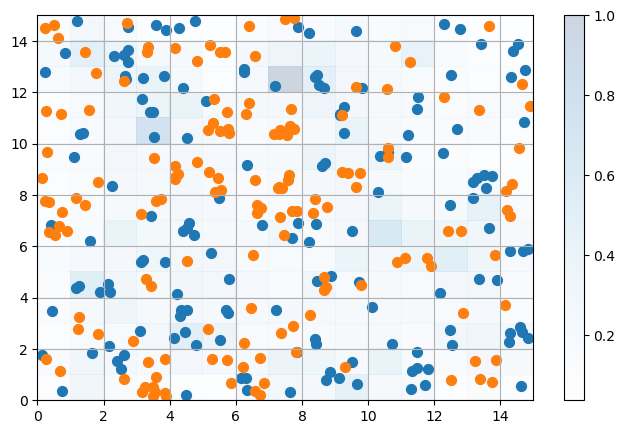

In [35]:
w_x, w_y = zip(*[som_3.winner(d) for d in x.values])
w_x = np.array(w_x)
w_y = np.array(w_y)

figure (figsize=(8,5),dpi=100)
plt.pcolor(som_3.distance_map().T, cmap='Blues', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, label=target[c])
plt.grid()
plt.show()

# Conclusão a priori 

Talvez utilizando somente uma classe de cada um dos dados como eu fiz eu consiga ter melhor resultado que usando o cluster 

não deu muito certo 

# Conclusão 

Era esperado que uma vez que visualmente parece que a série temporal é de fácil destinção que ela seria facilmente distinta com o uso de som e que seria fácil a distinção entre as duas classes mas devido até o provável ruido causado pelo variabilidade dentro da série esses dados ficam dificilmente identificados.